# Exercise 2.6

## ToDo

* README.md
* requirements.txt
* move helper function to .py file

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import mlb as mlb

### General setup

In [9]:
rng = np.random.default_rng(3317)
plt.style.use("ggplot")

## Parameters for experiment

In [10]:
n = 100  # number of samples
K = 2  # number of indicators in split-KL

delta = 0.05  # confidence level
delta_star = delta / (n + 1)  # for the *ordinary* KL bound
delta_split = delta / K  # so that ln(1/delta_split)=ln(K/δ)

p_12_grid = np.linspace(0.0, 1.0, 201)  # e.g. 0.0, 0.005, ..., 1.0

## Compute upper bounds

In [11]:
gap_kl = []  # KL:  p − p_hat
gap_splitkl = []  # split-KL : p_split − p_hat
real_error = []  # realised error: p_true - p_hat

p_true = 0.5  # E[X] = 0.5 for all p_12

In [12]:
for p_12 in p_12_grid:
    p0 = p1 = (1.0 - p_12) / 2.0
    probabilities = [p0, p_12, p1]
    support = np.array([0.0, 0.5, 1.0])

    sample = rng.choice(support, size=n, p=probabilities)
    p_hat = sample.mean()  # empirical mean of X

    # realised error
    real_error.append(p_true - p_hat)

    # KL bound
    p_plus = mlb.kl_upper_bound(p_hat, n, delta_star)
    gap_kl.append(p_plus - p_hat)

    # split-KL bound using eq. 2.34 from the lecture notes
    # empirical means of the two indicators
    p1_hat = np.mean(sample >= 0.5)  # proportion >=0.5
    p2_hat = np.mean(sample >= 1.0)  # proportion >=1.0

    p1_plus = mlb.kl_upper_bound(p1_hat, n, delta_split)
    p2_plus = mlb.kl_upper_bound(p2_hat, n, delta_split)

    # b0=0, α1=α2=0.5
    p_plus_split = 0.5 * (p1_plus + p2_plus)
    gap_splitkl.append(p_plus_split - p_hat)

In [13]:
gap_kl = np.array(gap_kl)
gap_splitkl = np.array(gap_splitkl)
real_error = np.array(real_error)

## Plot

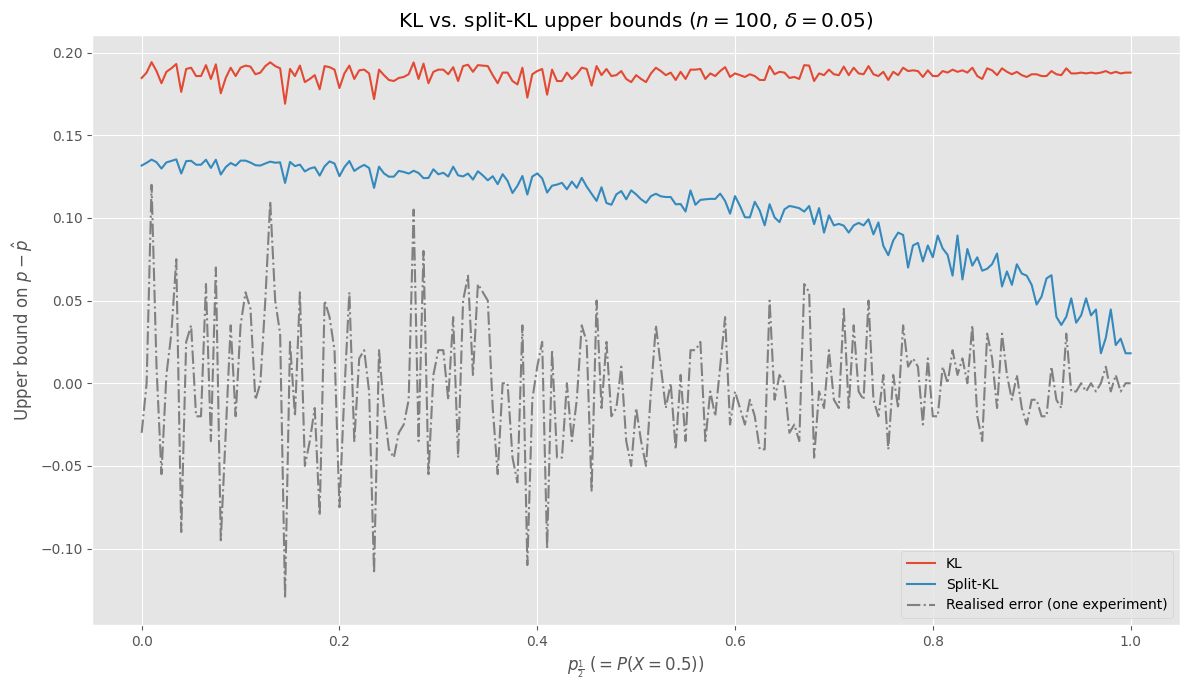

In [14]:
plt.figure(figsize=(12, 7))
plt.plot(p_12_grid, gap_kl, label="KL")
plt.plot(p_12_grid, gap_splitkl, label="Split-KL")
plt.plot(
    p_12_grid, real_error, "-.", color="grey", label="Realised error (one experiment)"
)

plt.xlabel(r"$p_{\frac{1}{2}} \;(=P(X=0.5))$")
plt.ylabel(r"Upper bound on $p - \hat p$")
plt.title(rf"KL vs. split-KL upper bounds ($n={n}$, $\delta={delta}$)")
plt.legend()
plt.tight_layout()

savefig = True
if savefig:
    plt.savefig(
        "./figures/exercise_2_6_splitkl_vs_kl.pdf", dpi=600, bbox_inches="tight"
    )
plt.show()